# Logistic Regression vs OLS on BankChurners Dataset
This notebook explores the performance of Ordinary Least Squares (OLS) and Logistic Regression in predicting customer attrition using the `BankChurners_small.csv` dataset.

**Steps:**
1. Load and visualize data.
2. Fit an OLS model and evaluate its accuracy.
3. Fit a Logistic Regression model and evaluate its accuracy.


## Step 1: Load the Dataset
We start by loading the dataset and displaying its structure.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
file_path = "data/BankChurners_small_updated.csv"  # Ensure this file is in the same directory
df = pd.read_csv(file_path)

# Display the first few rows to understand the structure
df.head()

,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Attrition_Flag
0,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0
1,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0
2,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0
3,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0
4,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0


## Step 2: Data Visualization
We plot histograms for each column to understand the data distribution.

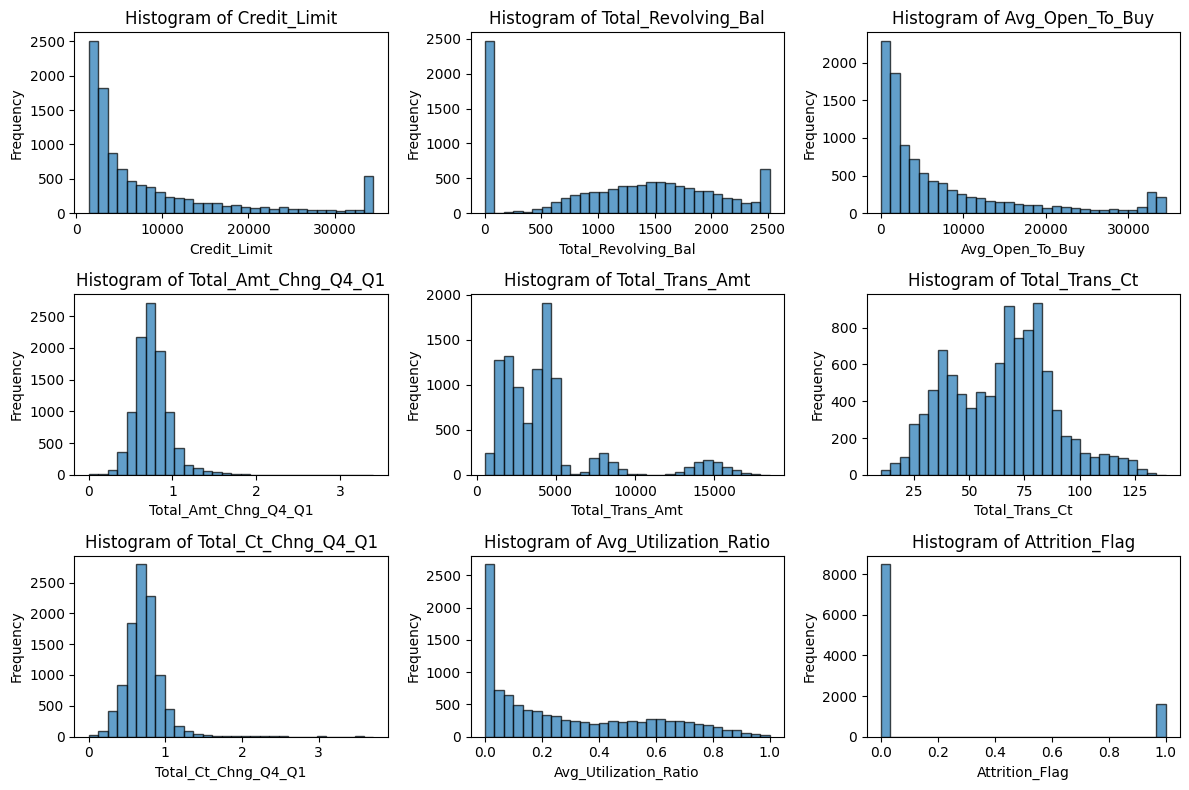

In [2]:
# Set figure size
plt.figure(figsize=(12, 8))

# List of columns to visualize
columns = df.columns

# Loop through each column and create a histogram
for i, column in enumerate(columns):
    plt.subplot(3, 3, i + 1)  # Arrange in a 2x2 grid
    plt.hist(df[column], bins=30, edgecolor='black', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')

# Adjust layout and display
plt.tight_layout()
plt.show()

## Step 3: Ordinary Least Squares (OLS) Regression
We treat the binary response variable as numerical and use OLS regression. Predictions are converted to binary values using a threshold of 0.5.

In [5]:
# Define predictors (X) and response variable (y)
X = df.drop(columns=['Attrition_Flag'])
#X = df[['Total_Trans_Amt']]
y = df['Attrition_Flag']  # Treating binary response as numerical

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# random_state above is the random seed and we need to include this to produce reproducible results.
# the random seed ensures we pick the same random numbers "of the index" to pick the same random numbers for the
    # train/test split.

# Fit an OLS model using sklearn's LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ols = ols_model.predict(X_test)

# Convert continuous predictions into binary (0.5 threshold)
y_pred_ols_binary = (y_pred_ols >= 0.5).astype(int)

# Compute confusion matrix and accuracy
conf_matrix_ols = confusion_matrix(y_test, y_pred_ols_binary)
accuracy_ols = accuracy_score(y_test, y_pred_ols_binary)

# Calculate true positive rate (TPR) 
# Note: for the bank, it is more important to predict the churners rather than the non-churners. 
# Therefore, TPR is more important than accuracy
TP = conf_matrix_ols[1, 1]
FN = conf_matrix_ols[1, 0]
TPR_ols = TP / (TP + FN)

# Display results
print("Confusion Matrix for OLS:\n", conf_matrix_ols)
print(f"\nAccuracy for OLS: {accuracy_ols:.4f}")
print(f"\nTrue Positive Rate (TPR) for OLS: {TPR_ols:.4f}")

Confusion Matrix for OLS:
 [[1669   30]
 [ 227  100]]

Accuracy for OLS: 0.8731

True Positive Rate (TPR) for OLS: 0.3058


# Understanding the Confusion Matrix in Scikit-Learn

In **binary classification**, Scikit-Learn's `confusion_matrix(y_true, y_pred)` returns a **2×2 matrix** in the following format:

|Actual \ Predicted |	Predicted Negative (0)  |	Predicted Positive (1)  |
|:---               |   :----:                  | :----:                    |
|Actual Negative (0)|	True Negative (TN)  	|  False Positive (FP)      |
|Actual Positive (1) |	False Negative (FN)	    |True Positive (TP)         |

and 
$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$


## Step 4: Logistic Regression
We now fit a logistic regression model and evaluate its performance.

In [6]:
# Fit a logistic regression model
log_reg_model = LogisticRegression(penalty=None)  # we set the penalty to None for now. In week 4 we learn more 
# about penalty.
log_reg_model.fit(X_train, y_train)

# Show the fitted y and the actual y in the training sample
y_train_pred_log = log_reg_model.predict(X_train)

# Make predictions on the test set
y_pred_log = log_reg_model.predict(X_test)

# Compute confusion matrix and accuracy
conf_matrix_log = confusion_matrix(y_test, y_pred_log)
accuracy_log = accuracy_score(y_test, y_pred_log)

# Calculate true positive rate (TPR)
TP_log = conf_matrix_log[1, 1]
FN_log = conf_matrix_log[1, 0]
TPR_log = TP_log / (TP_log + FN_log)

# Display results  
print("Confusion Matrix for Logistic Regression:\n", conf_matrix_log)
print(f"\nAccuracy for Logistic Regression: {accuracy_log:.4f}")
print(f"\nTrue Positive Rate (TPR) for Logistic Regression: {TPR_log:.4f}")

Confusion Matrix for Logistic Regression:
 [[1635   64]
 [ 179  148]]

Accuracy for Logistic Regression: 0.8801

True Positive Rate (TPR) for Logistic Regression: 0.4526


c:\Users\marwi\miniconda3\envs\ml_for_finance\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Conclusion
- Logistic regression yields bettter accuracy and TPR compared to OLS.
- We will learn more about the ConvergenceWarning we get above in week 4.

  